In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
paths = [
    "../cpp/fp_sched_o_220601_tst.txt",
]

df_sched = pd.DataFrame()
for p in paths:
    df_sched = df_sched.append(pd.read_csv(p))

In [9]:
i_path = "../task_sched_input.txt"

In [25]:
df_tsk = pd.DataFrame(columns=["sid", "tid", "O", "T", "D", "X", "C1", "C2"])

with open(i_path) as f:
    t = int(f.readline())
    for sid in range(t):
        n = int(f.readline())
        for tid in range(n):
            o, t, d, x = list(map(int, f.readline().split(" ")))
            c1, c2 = list(map(int, f.readline().split(" ")))
            df_tsk = df_tsk.append({"sid": sid, "tid": tid, "O": o, "T": t, "D": d, "X": x, "C1": c1, "C2": c2}, ignore_index=True)
    if sid > 1000:
        break

KeyboardInterrupt: 

In [27]:
df_tsk.loc[df_tsk["sid"]==548]

,sid,tid,O,T,D,X,C1,C2
2192,548,0,0,11,11,1,1,1
2193,548,1,0,29,29,2,3,4
2194,548,2,0,19,19,1,3,3
2195,548,3,0,30,30,1,15,15


In [5]:
df_sched

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth
0,0,SPO,ACBF,FP,1,427,10,15
1,1,SPO,ACBF,FP,1,9,0,4
2,2,SPO,ACBF,FP,1,171,3,11
3,3,SPO,ACBF,FP,1,680,13,24
4,4,SPO,ACBF,FP,1,197,3,29
...,...,...,...,...,...,...,...,...
995,995,SPO,ACBF,FP,1,522,5,39
996,996,SPO,ACBF,FP,1,173,1,20
997,997,SPO,ACBF,FP,1,106,1,19
998,998,SPO,ACBF,FP,1,17,0,5


In [7]:
df_sched.loc[df_sched["depth"] > 32].sort_values("n_visited")

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth
548,548,SPO,ACBF,FP,1,45,0,33
78,78,SPO,ACBF,FP,1,47,0,33
914,914,SPO,ACBF,FP,1,48,0,34
196,196,SPO,ACBF,FP,1,55,0,34
48,48,SPO,ACBF,FP,1,59,0,33
...,...,...,...,...,...,...,...,...
317,317,SPO,ACBF,FP,1,1619,16,35
799,799,SPO,ACBF,FP,1,1818,19,35
308,308,SPO,ACBF,FP,1,2020,20,43
172,172,SPO,ACBF,FP,1,2239,23,34


In [8]:
548*8+1

4385

In [23]:
df_sched

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth
0,0,SPO,ACBF,LWLF,1,171353,2903,67
1,0,SPO,ACBF,EDF-VD,1,142082,3104,67
2,1,SPO,ACBF,LWLF,1,111435,3338,89
3,1,SPO,ACBF,EDF-VD,1,100013,2621,89
4,2,SPO,ACBF,LWLF,1,342417,9148,55
...,...,...,...,...,...,...,...,...
789,39997,SPO,ACBF,EDF-VD,1,42497,693,27
790,39998,SPO,ACBF,LWLF,1,33863,548,26
791,39998,SPO,ACBF,EDF-VD,1,33437,547,25
792,39999,SPO,ACBF,LWLF,1,130931,2261,30


In [24]:
df_sched["duration_s"] = df_sched["duration"]/1000

In [25]:
df_header = pd.read_csv("../task_sched_header.csv")

In [26]:
df_sched_piv = df_sched.pivot(index="tid", columns="scheduler", values="schedulable")

In [27]:
df = df_header.merge(df_sched_piv, right_on="tid", left_on="ts_id", how="left") # todo

/var/folders/lr/nrx49w_54md3dfrcjb0y_b580000gn/T/ipykernel_1405/1198145337.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sched_u = df.groupby("target_U")['AMCmax', 'EDFVD_test', 'Vestal','EDF-VD', 'LWLF'].apply(lambda x: x.sum()/x.notna().sum())


<AxesSubplot:xlabel='target_U'>

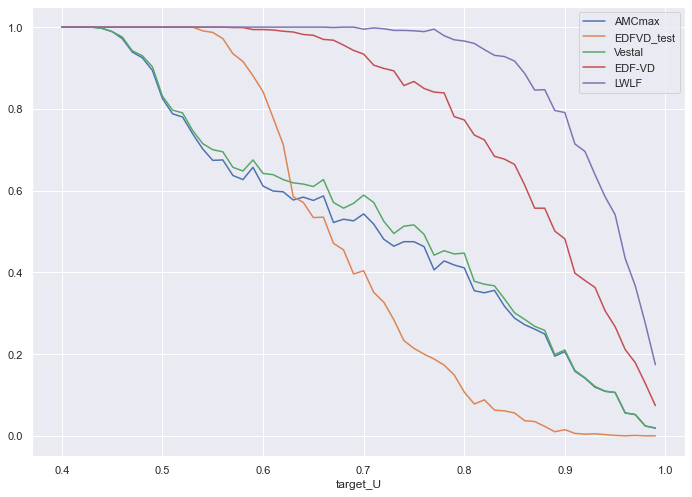

In [28]:
sched_u = df.groupby("target_U")['AMCmax', 'EDFVD_test', 'Vestal','EDF-VD', 'LWLF'].apply(lambda x: x.sum()/x.notna().sum())
sched_u.plot()

/var/folders/lr/nrx49w_54md3dfrcjb0y_b580000gn/T/ipykernel_1405/368409500.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("target_U")['AMCmax', 'EDFVD_test', 'Vestal','EDF-VD', 'LWLF'].apply(lambda x: x.notna().sum()).plot()


<AxesSubplot:xlabel='target_U'>

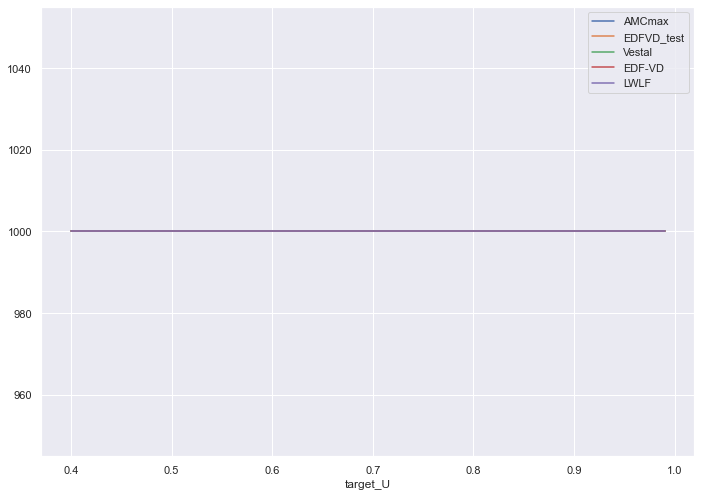

In [29]:
df.groupby("target_U")['AMCmax', 'EDFVD_test', 'Vestal','EDF-VD', 'LWLF'].apply(lambda x: x.notna().sum()).plot()

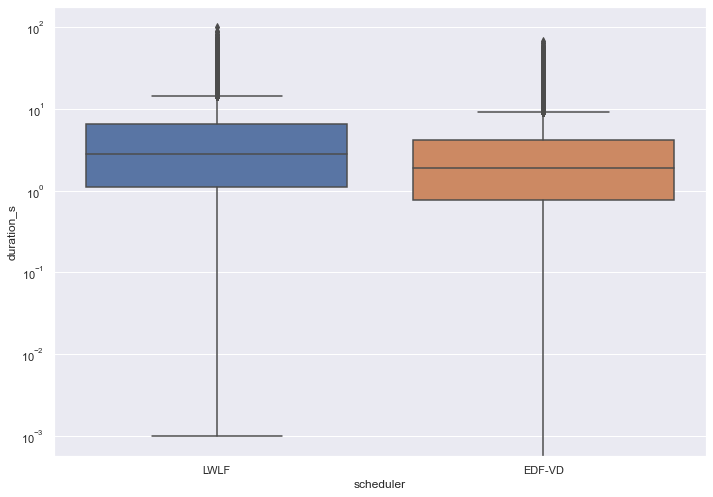

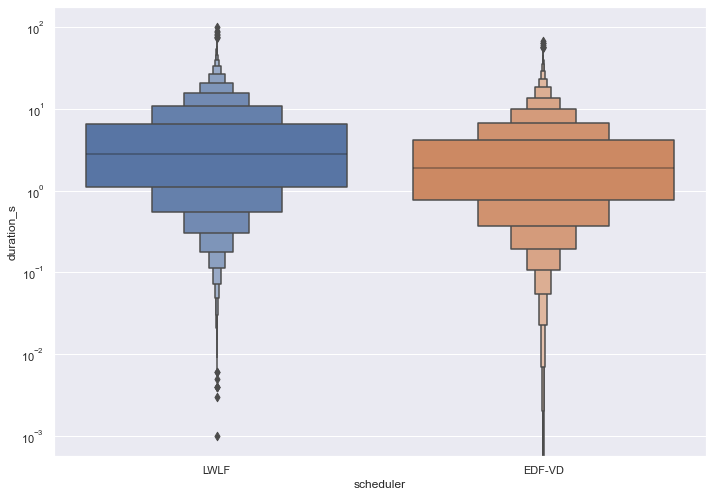

In [30]:
g=sns.boxplot(data=df_sched, x="scheduler", y="duration_s")
g.set_yscale("log")
plt.show()

g=sns.boxenplot(data=df_sched, x="scheduler", y="duration_s")
g.set_yscale("log")
plt.show()

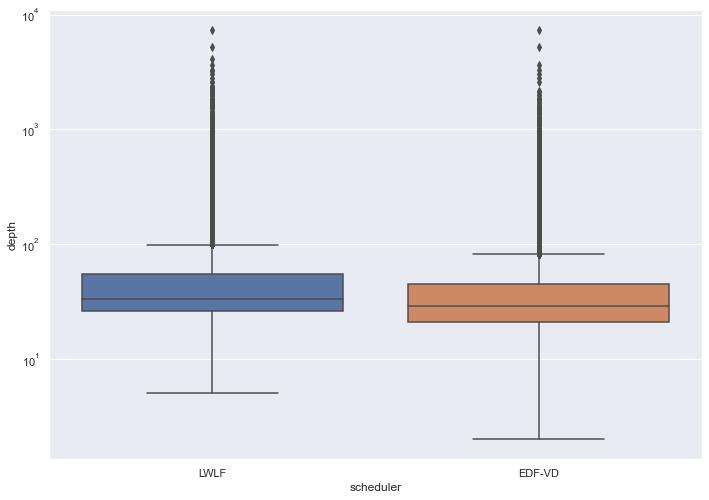

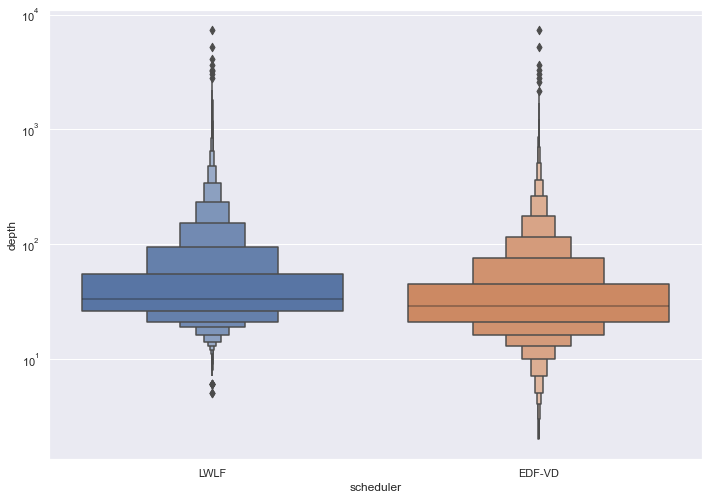

In [31]:
g=sns.boxplot(data=df_sched, x="scheduler", y="depth")
g.set_yscale("log")
plt.show()

g=sns.boxenplot(data=df_sched, x="scheduler", y="depth")
g.set_yscale("log")
plt.show()

In [32]:
df_sched.loc[(df_sched["scheduler"] == "LWLF") & (df_sched["schedulable"] == 0)].sort_values("depth", ascending = False)

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth,duration_s
18432,29216,SPO,ACBF,LWLF,0,744180,16214,2179,16.214
15384,27692,SPO,ACBF,LWLF,0,3319150,99774,2163,99.774
17110,18555,SPO,ACBF,LWLF,0,186222,4254,946,4.254
1426,30713,SPO,ACBF,LWLF,0,1916186,50742,927,50.742
18436,49218,SPO,ACBF,LWLF,0,1779709,39786,901,39.786
...,...,...,...,...,...,...,...,...,...
7292,13646,SPO,ACBF,LWLF,0,2038,34,6,0.034
15330,57665,SPO,ACBF,LWLF,0,1634,15,6,0.015
19508,59754,SPO,ACBF,LWLF,0,3577,66,6,0.066
19444,59722,SPO,ACBF,LWLF,0,3461,46,6,0.046


In [33]:
df_sched.groupby("scheduler")["duration_s"].mean().sum()/3600*((60000-df_sched.shape[0]/2)/6)

0.0

In [34]:
df.loc[(df['EDF-VD']==0)].sort_values("U")

,U,target_U,nbt,AMCmax,EDFVD_test,Vestal,ts_id,EDF-VD,LWLF
24645,0.569833,0.57,4.0,0.0,1.0,0.0,24645.0,0,1
9873,0.578903,0.58,4.0,0.0,0.0,0.0,9873.0,0,1
2953,0.586092,0.59,4.0,0.0,0.0,0.0,2953.0,0,1
27921,0.586335,0.59,4.0,0.0,0.0,0.0,27921.0,0,1
14564,0.586640,0.59,4.0,1.0,1.0,1.0,14564.0,0,1
...,...,...,...,...,...,...,...,...,...
59943,0.994895,0.99,4.0,0.0,0.0,0.0,59943.0,0,0
915,0.994902,0.99,4.0,0.0,0.0,0.0,915.0,0,0
58983,0.994903,0.99,4.0,0.0,0.0,0.0,58983.0,0,0
58970,0.994949,0.99,4.0,0.0,0.0,0.0,58970.0,0,0


In [35]:
df.groupby(["LWLF", "EDF-VD"])["ts_id"].count()

LWLF  EDF-VD
0     0          5808
      1            58
1     0          6493
      1         47641
Name: ts_id, dtype: int64

In [36]:
df_sched.loc[(df_sched['tid'].isin(df.loc[(df['LWLF']==0) & (df['EDF-VD']==1), "ts_id"])) ]

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth,duration_s
1840,920,SPO,ACBF,LWLF,0,134757,3240,29,3.240
1841,920,SPO,ACBF,EDF-VD,1,145590,3538,80,3.538
3454,1727,SPO,ACBF,LWLF,0,49740,1167,28,1.167
3455,1727,SPO,ACBF,EDF-VD,1,41690,967,30,0.967
3528,1764,SPO,ACBF,LWLF,0,166892,3855,27,3.855
...,...,...,...,...,...,...,...,...,...
107,9740,SPO,ACBF,EDF-VD,1,187368,3495,61,3.495
664,19946,SPO,ACBF,LWLF,0,200357,3595,31,3.595
665,19946,SPO,ACBF,EDF-VD,1,160096,2989,47,2.989
300,29794,SPO,ACBF,LWLF,0,88438,1748,86,1.748


In [37]:
df_sched.loc[(df_sched['tid'].isin(df.loc[(df['LWLF']==0) & (df['EDF-VD']==1), "ts_id"])) ]["tid"].unique()

array([  920,  1727,  1764,  1768,  2343,  3558,  4271,  4294,  4603,
        5701,  6764,  7682,  8278,  8823,  8885,  8906, 10301, 11517,
       13942, 15218, 20047, 21574, 22945, 24520, 24909, 28741, 31475,
       31867, 32325, 32737, 32773, 34914, 40143, 40901, 41579, 42512,
       43049, 45556, 46319, 47075, 47285, 48168, 48266, 48741, 49395,
       50634, 51495, 51540, 52820, 53784, 54147, 55835, 57741, 58197,
       58475,  9740, 19946, 29794])